In [168]:
#Principle Component Analysis
import pandas as pd
from sklearn.model_selection import train_test_split
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [169]:
from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()
sdc.fit(X_train)
X_trainstd = sdc.transform(X_train)
X_teststd = sdc.transform(X_test)

In [170]:
import numpy as np
cov_mat = np.cov(X_trainstd.T)
eigen_val, eigen_vec = np.linalg.eig(cov_mat)
print(cov_mat.shape)
print(eigen_val.shape)
print(eigen_vec.shape)

(13, 13)
(13,)
(13, 13)


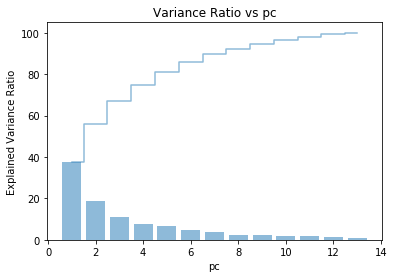

In [171]:
#to know how much each information is hold by each pc's
import matplotlib.pyplot as plt
var_ex = [(i/np.sum(eigen_val)*100)
           for i in sorted(eigen_val, reverse=True)]
plt.bar(range(1,14), var_ex, align='center', label='individual explained variance', alpha=0.5)
plt.step(range(1,14), np.cumsum(var_ex), where="mid", label='cumulative explained variance',alpha=0.5)
plt.xlabel("pc")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Ratio vs pc")
plt.show()

In [175]:
eigen_pair = [(np.abs(eigen_val[i]), eigen_vec[:,i])
             for i in range(eigen_val.shape[0])]
eigen_pair.sort(key=lambda k: k[0], reverse=True)

In [176]:
eigen_pair[1]

(2.466350315759231,
 array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
         0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
        -0.27924322, -0.174365  ,  0.36315461]))

In [177]:
w = np.hstack((eigen_pair[0][1][:,np.newaxis],eigen_pair[1][1][:,np.newaxis]))

In [178]:
 w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [179]:
X_train_pca = X_trainstd.dot(w)

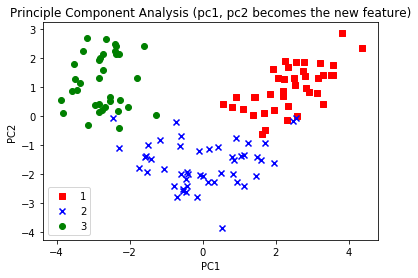

In [180]:
c1=['red','blue','green']
m1=['s','x','o']
for i,j,k in zip(np.unique(y_train), c1, m1):
    plt.scatter(X_train_pca[y_train==i,0], X_train_pca[y_train==i,1], label=i, c=j, marker=k)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principle Component Analysis (pc1, pc2 becomes the new feature)")
plt.legend(loc='best')
plt.show()

In [263]:
from matplotlib.colors import ListedColormap
def plt_decision_regions(X, y, classifier, resolution=0.02):
    colors = ["red", "blue", "lightgreen", "gray", "cyan"]
    markers = ["s", "x", "o"]
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1min, x1max = X[:,0].min()-2, X[:,0].max()+2
    x2min, x2max = X[:,0].min()-2, X[:,0].max()+2
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                          np.arange(x2min, x2max, resolution))
   # plt.plot(xx1, xx2,marker='o')
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.2, cmap=cmap)
   # print(xx1.shape)
   # print("----------")
   # print(xx2)
   # print("----------")
   # print(xx1.ravel())
   # print("----------")
   # print(xx2.ravel())
   # print("----------")
   # print(np.array([xx1.ravel(), xx2.ravel()]))
    for cl,i in enumerate(np.unique(y)):
        plt.scatter(X[y==i,0], X[y==i,1], alpha=0.5, c=cmap(cl), marker=markers[cl], label=i)

0.9814814814814815 0.967741935483871


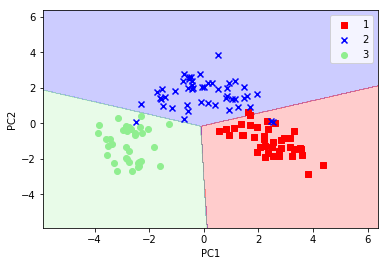

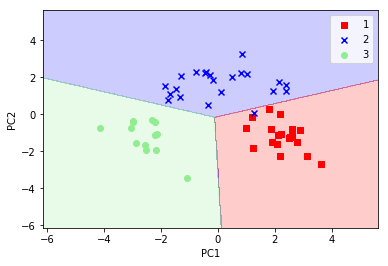

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_trainpca = pca.fit_transform(X_trainstd)
X_testpca = pca.transform(X_teststd)
lr.fit(X_trainpca, y_train)
print(lr.score(X_testpca, y_test),lr.score(X_trainpca,y_train))
plt_decision_regions(X_trainpca, y_train, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best")
plt.show()
plt_decision_regions(X_testpca, y_test, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best")
plt.show()

In [183]:
#Linear Discriminant Analysis
y = np.unique(y_train)
S_W = np.zeros((X_trainstd.shape[0], X_trainstd.shape[0]))
mean_vec = []
for i in y:
    mean_vec.append(np.mean(X_trainstd[y_train==i,:], axis=0))
d = 13 # number of features
S_W = np.zeros((d, d))
#print(mean_vec[0])
for label,mv in zip(range(1, 4), mean_vec):
    class_scatter = np.cov(X_trainstd[y_train==label].T) #to calculate cov use by this zip as you can see it is diff if we dont use by this
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))
    #print(S_W)
mean_overall = np.mean(X_trainstd, axis=0)
S_B = np.zeros((d,d))
for i in y:
    n = X_trainstd[y_train==i].shape[0]
    #print(mean_vec)
    vec = mean_vec[i-1].reshape(d,1)
    overall = mean_overall.reshape(d,1)
    ss1 = n*(vec-overall).dot((vec-overall).T)
    S_B+=ss1
print('Between-class scatter matrix: %sx%s'% (S_B.shape[0], S_B.shape[1]))

Scaled within-class scatter matrix: 13x13
Between-class scatter matrix: 13x13


In [184]:
S_W1=np.zeros((d,d))
for i in y:
    class_scatter = np.cov(X_trainstd[y_train==label].T)
    S_W1 += class_scatter
#S_W1==S_W

In [192]:
eigen_val, eigen_vec = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_val[i].real), eigen_vec[:,i])
             for i in range(eigen_val.shape[0])]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

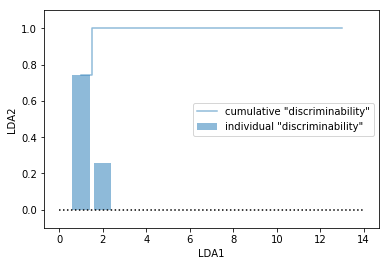

In [207]:
tot = sum(eigen_val.real)
discr = [(i/tot) for i in sorted(eigen_val.real, reverse=True)]
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1,14), np.cumsum(discr), alpha=0.5, where='mid', label='cumulative "discriminability"')
plt.hlines(y=0, xmin=0, xmax=14, linestyles='dotted')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [215]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
W = np.array([eigen_pairs[0][1].real, eigen_pairs[1][1].real]).T

In [218]:
w

array([[-0.06615877, -0.37974125],
       [ 0.03862056, -0.22064303],
       [-0.0217454 , -0.3816223 ],
       [ 0.18400808,  0.30175689],
       [-0.00343355,  0.01414971],
       [ 0.23263171,  0.02337798],
       [-0.77466862,  0.18689504],
       [-0.08114771,  0.06961935],
       [ 0.08750287,  0.17958558],
       [ 0.18500646, -0.28397654],
       [-0.06595992,  0.23490757],
       [-0.38052382,  0.07295849],
       [-0.32854326, -0.59707531]])

In [219]:
W

array([[-0.06615877, -0.37974125],
       [ 0.03862056, -0.22064303],
       [-0.0217454 , -0.3816223 ],
       [ 0.18400808,  0.30175689],
       [-0.00343355,  0.01414971],
       [ 0.23263171,  0.02337798],
       [-0.77466862,  0.18689504],
       [-0.08114771,  0.06961935],
       [ 0.08750287,  0.17958558],
       [ 0.18500646, -0.28397654],
       [-0.06595992,  0.23490757],
       [-0.38052382,  0.07295849],
       [-0.32854326, -0.59707531]])

In [221]:
X_trainlda = X_trainstd.dot(W)
x_trainlda = X_trainstd.dot(w)

In [222]:
X_trainlda

array([[-1.92942894e+00, -4.45088883e-01],
       [ 1.57807512e-01,  2.35263187e+00],
       [ 1.71629527e+00, -1.89155492e+00],
       [ 1.28405614e+00, -7.42896176e-01],
       [-3.18775399e-01,  1.27757029e+00],
       [ 1.27250409e+00, -4.08881854e-01],
       [ 1.85236273e+00, -1.42233426e+00],
       [-1.02210223e+00, -8.52169436e-01],
       [ 6.88039360e-01,  3.19256499e-01],
       [ 1.48032326e+00, -1.84708930e-02],
       [-3.36464162e-01,  2.01853186e+00],
       [ 6.77346281e-01,  3.65479315e-01],
       [ 1.16249806e+00, -9.77388857e-01],
       [-1.29307372e-01,  6.74127814e-01],
       [-1.40601187e+00, -7.93733181e-01],
       [ 8.97318514e-01,  1.33506214e+00],
       [-3.52022450e-01,  1.32801757e+00],
       [ 9.30409494e-01,  4.30103340e-01],
       [-5.59207624e-01, -2.57885953e-01],
       [-1.91287339e+00, -1.30836148e+00],
       [-7.77419710e-01,  1.33152423e+00],
       [-6.46820433e-01,  1.15051022e+00],
       [ 1.93700879e+00, -8.84634720e-01],
       [ 2.

In [223]:
x_trainlda

array([[-1.92942894e+00, -4.45088883e-01],
       [ 1.57807512e-01,  2.35263187e+00],
       [ 1.71629527e+00, -1.89155492e+00],
       [ 1.28405614e+00, -7.42896176e-01],
       [-3.18775399e-01,  1.27757029e+00],
       [ 1.27250409e+00, -4.08881854e-01],
       [ 1.85236273e+00, -1.42233426e+00],
       [-1.02210223e+00, -8.52169436e-01],
       [ 6.88039360e-01,  3.19256499e-01],
       [ 1.48032326e+00, -1.84708930e-02],
       [-3.36464162e-01,  2.01853186e+00],
       [ 6.77346281e-01,  3.65479315e-01],
       [ 1.16249806e+00, -9.77388857e-01],
       [-1.29307372e-01,  6.74127814e-01],
       [-1.40601187e+00, -7.93733181e-01],
       [ 8.97318514e-01,  1.33506214e+00],
       [-3.52022450e-01,  1.32801757e+00],
       [ 9.30409494e-01,  4.30103340e-01],
       [-5.59207624e-01, -2.57885953e-01],
       [-1.91287339e+00, -1.30836148e+00],
       [-7.77419710e-01,  1.33152423e+00],
       [-6.46820433e-01,  1.15051022e+00],
       [ 1.93700879e+00, -8.84634720e-01],
       [ 2.

In [224]:
X_testlda = X_teststd.dot(W)

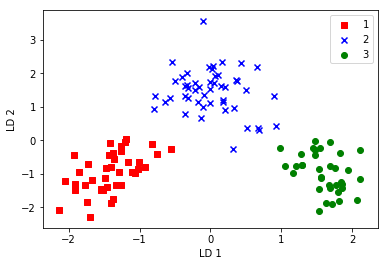

In [227]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for y, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_trainlda[y_train==y,0], X_trainlda[y_train==y,1], color=c, marker=m, label=y)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

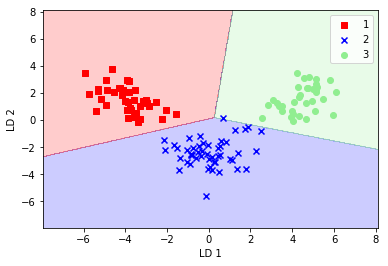

In [240]:
#lda in scikit learn
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_trainlda = lda.fit_transform(X_trainstd, y_train)
lr = LogisticRegression()
lr = lr.fit(X_trainlda, y_train)
plt_decision_regions(X_trainlda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

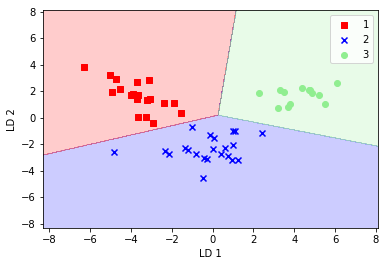

In [241]:
X_testlda = lda.transform(X_teststd)
plt_decision_regions(X_testlda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.show()

In [1]:
#Kernel Principal Component Analysis
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5, label=0)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5, label=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

NameError: name 'plt' is not defined

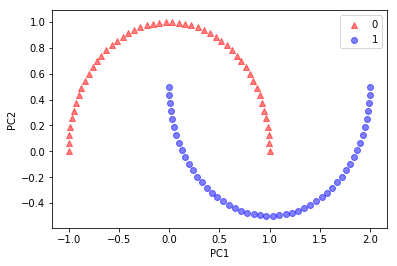

In [270]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5, label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5, label=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

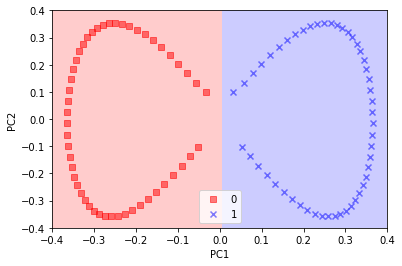

In [282]:
lr.fit(X_skernpca, y)
plt_decision_regions(X_skernpca, y, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(-0.4, 0.4)
plt.xlim(-0.4, 0.4)
plt.legend(loc="best")
plt.show()

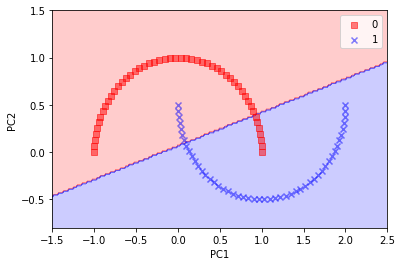

In [283]:
lr.fit(X, y)
plt_decision_regions(X, y, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(-0.8, 1.5)
plt.xlim(-1.5, 2.5)
plt.legend(loc="best")
plt.show()